In [1]:
!pip install tensorflow==2.10.0
!pip install numpy==1.23

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 1s 1s/step


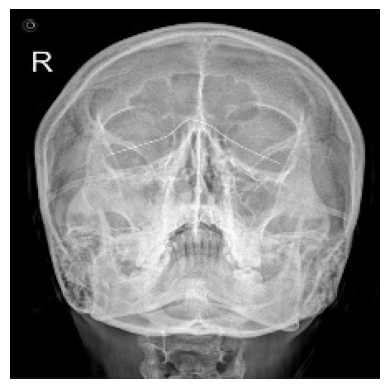

Class: moderate, Confidence Score: 1.00


In [4]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the correct model path on Google Drive
model_path = '/content/drive/MyDrive/sinusities/inceptionv3_model_improved.h5'

# Load the model and labels
model = load_model(model_path, compile=False)
class_names = ["mild", "moderate", "severe"]

# Local image path on Google Drive
image_path = "/content/drive/MyDrive/sinusities/sinusities_dataset/moderate/_-view-technique-600nw-2421031613.jpg"

# Function to preprocess the image
def preprocess_image(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")

    # Resize the image to (224, 224) as required by InceptionV3
    # Resize the image to (224, 224) as required by ResNet50
    # Resize the image to (224, 224) as required by VGG16
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
    image_array = np.asarray(image)

    # Normalize the image (same as the original InceptionV3 model preprocessing)
    normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

    # Create the array of the right shape for the model
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    data[0] = normalized_image_array

    return image, data  # Returning both the image and preprocessed data

# Function to predict the class of the image
def predict_image(data):
    # Make the prediction
    prediction = model.predict(data)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    return class_name, confidence_score

# Main script execution
if __name__ == "__main__":
    try:
        image, data = preprocess_image(image_path)  # Now using the correct image size
        class_name, confidence_score = predict_image(data)

        # Show the image using matplotlib
        plt.imshow(image)
        plt.axis('off')  # Hide axes
        plt.show()

        # Print the prediction and confidence score
        print(f"Class: {class_name.strip()}, Confidence Score: {confidence_score:.2f}")
    except Exception as e:
        print(f"Error: {e}")
